# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
BCW = pd.read_csv('breast-cancer-wisconsin-data.csv')
BCW.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [4]:
BCW1 = BCW.drop(['ID'], axis=1)
BCW1.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
BCW1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
BCW1.shape

(699, 10)

In [7]:
BCW1.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
print (BCW1.isnull().sum())

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [9]:
BCW1['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

   Bare Nuclei  count      prop
0            1    402  0.575107
1           10    132  0.188841
2            2     30  0.042918
3            5     30  0.042918
4            3     28  0.040057
5            8     21  0.030043
6            4     19  0.027182
7            ?     16  0.022890
8            9      9  0.012876
9            7      8  0.011445
10           6      4  0.005722


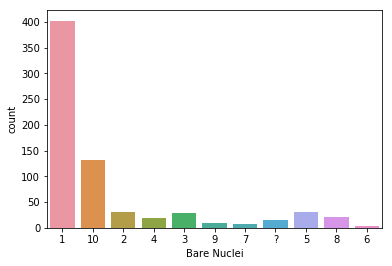

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
freq = BCW1['Bare Nuclei'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(BCW1['Bare Nuclei'])


In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
BCW1 = BCW1.drop(BCW1[BCW1['Bare Nuclei']=='?'].index)

  Bare Nuclei  count      prop
0           1    402  0.588580
1          10    132  0.193265
2           2     30  0.043924
3           5     30  0.043924
4           3     28  0.040996
5           8     21  0.030747
6           4     19  0.027818
7           9      9  0.013177
8           7      8  0.011713
9           6      4  0.005857


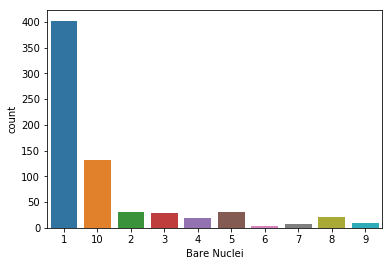

In [12]:
freq = BCW1['Bare Nuclei'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(BCW1['Bare Nuclei'])


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [13]:
# Check for correlation of variable
BCW1.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957,0.714790
Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755,0.820801
Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583,0.690958
Normal Nucleoli,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011,0.758228
Bland Chromatin,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.758228,0.718677,0.423448,1.000000


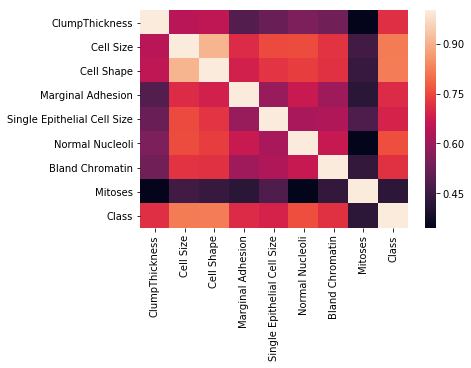

In [14]:
sns.heatmap(BCW1.corr())

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Ravichandra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ravichandra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


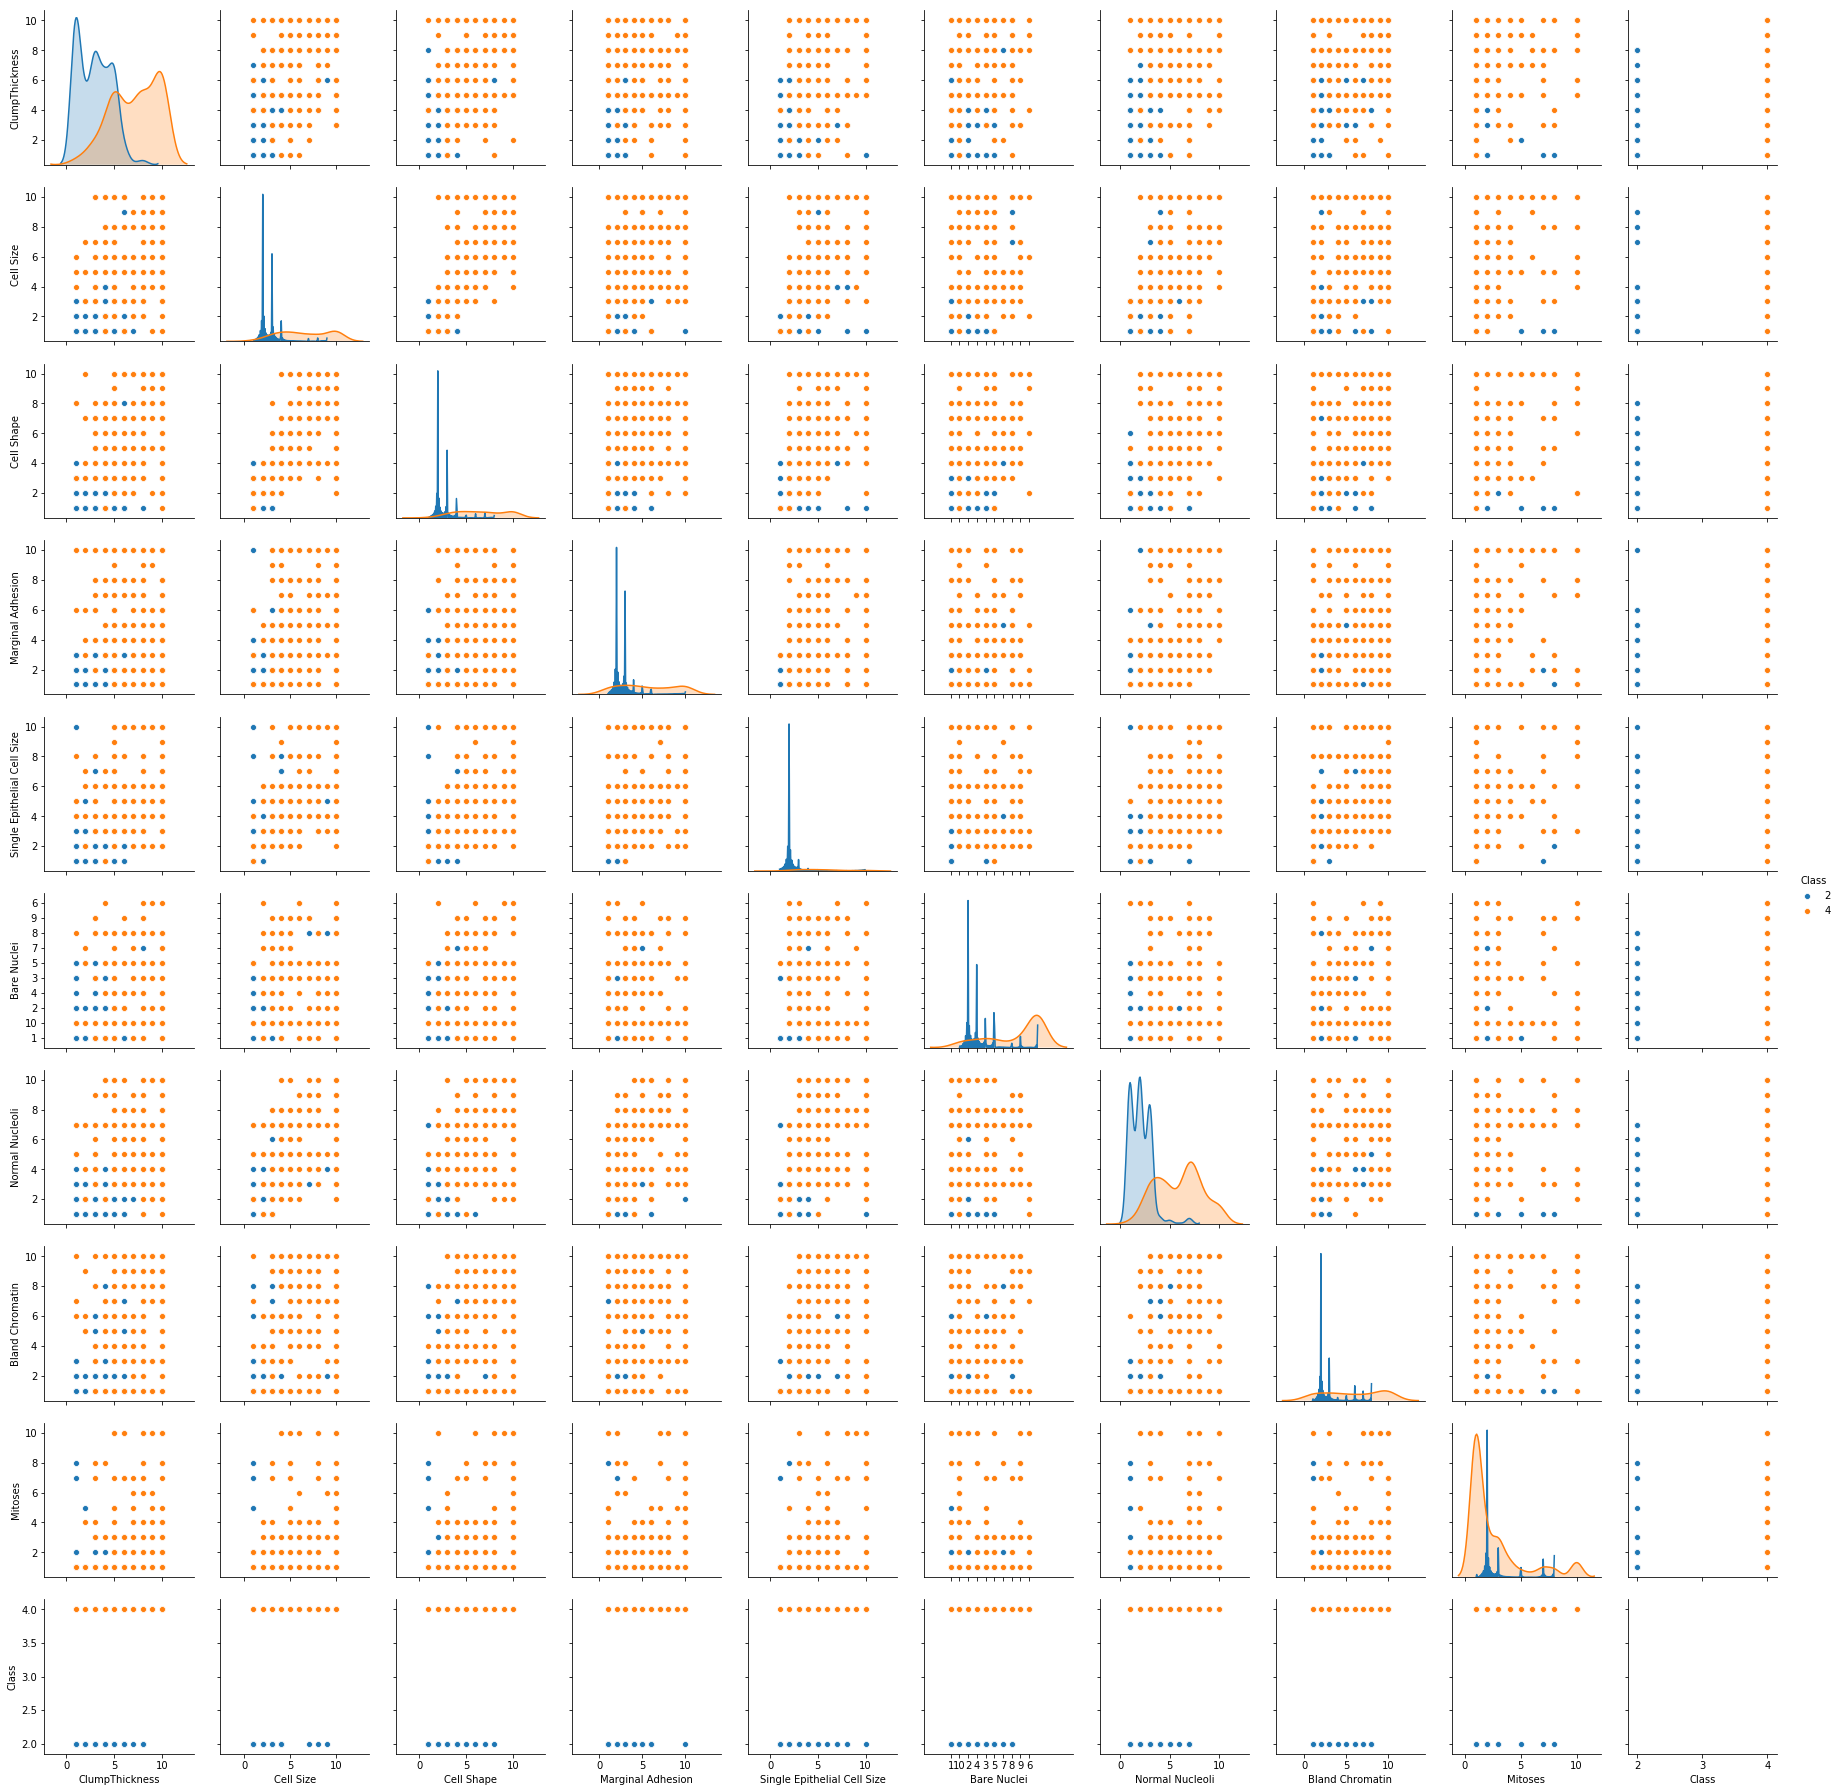

In [15]:
#Let us check for pair plots
import seaborn as sns
sns.pairplot(BCW1, hue = "Class")

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

### There is a positive correlation among independent variables. Pair plot  and corr plot gives visual hint that there is a existence of multicollinearity. Hence, PCA can be applied to reduce multicollinearity and dimenions in the data set. Data points in pair plots doesn't show much overlapping of data points. Hence, Data is linearly separable.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

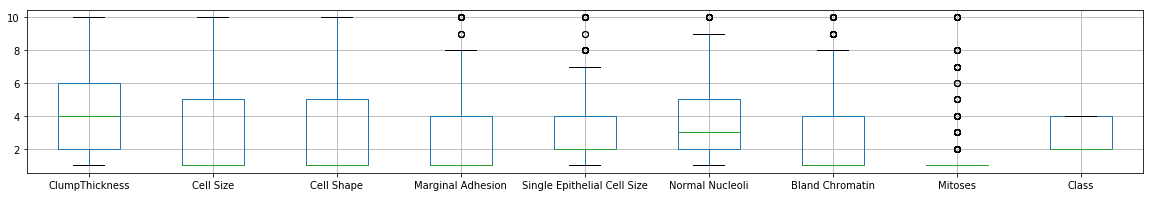

In [16]:
BCW1.boxplot(figsize=(20,3))

In [17]:
BCW1['Marginal Adhesion']= BCW1['Marginal Adhesion'].map(lambda x: 8 if x>8 
     else x)

In [18]:
BCW1['Single Epithelial Cell Size']= BCW1['Single Epithelial Cell Size'].map(lambda x: 7 if x>7 
     else x)

In [19]:
BCW1['Normal Nucleoli']= BCW1['Normal Nucleoli'].map(lambda x: 9 if x>9 
     else x)

In [20]:
BCW1['Bland Chromatin']= BCW1['Bland Chromatin'].map(lambda x: 8 if x>8
     else x)

In [21]:
BCW1['Mitoses']= BCW1['Mitoses'].map(lambda x: 1 if x>1
     else x)

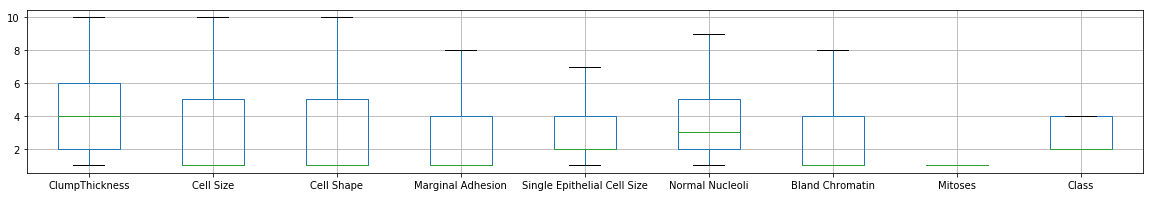

In [22]:
BCW1.boxplot(figsize=(20,3))

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [81]:
BCW_PCA = BCW1.drop(['Class'], axis=1)
BCW_PCA.head(3)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1


In [83]:
BCW_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
dtypes: int64(8), object(1)
memory usage: 73.4+ KB


In [88]:
BCW_PCA[['Bare Nuclei']] = BCW_PCA[['Bare Nuclei']].astype('int')
BCW_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int32
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
dtypes: int32(1), int64(8)
memory usage: 70.7 KB


In [89]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std =  sc.fit_transform(BCW_PCA)          
train_cov_matrix = np.cov(BCW_PCA.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[  7.95669442   5.55492201   5.5087998    3.52741699   2.77189001
    6.09606145   3.82636548   4.04698737   0.        ]
 [  5.55492201   9.39511299   8.31060356   5.49807216   4.28983311
    7.72566047   5.67324809   5.81932607   0.        ]
 [  5.5087998    8.31060356   8.93161531   5.18402082   4.0322001
    7.77409909   5.38353521   5.64840298   0.        ]
 [  3.52741699   5.49807216   5.18402082   6.12103751   2.87850951
    6.19247927   4.17503209   4.10053971   0.        ]
 [  2.77189001   4.28983311   4.0322001    2.87850951   3.15750334
    4.1013555    2.86555132   3.1917515    0.        ]
 [  6.09606145   7.72566047   7.77409909   6.19247927   4.1013555
   13.27769501   6.07540264   5.79912453   0.        ]
 [  3.82636548   5.67324809   5.38353521   4.17503209   2.86555132
    6.07540264   6.0010133    4.30747994   0.        ]
 [  4.04698737   5.81932607   5.64840298   4.10053971   3.1917515
    5.79912453   4.30747994   6.87468603   0.        ]
 [  0

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [90]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.31448117 -0.09960372 -0.90954658  0.11008442 -0.22504226 -0.02823979
  -0.0185172  -0.00165708  0.        ]
 [-0.42235206 -0.33725509  0.10410284 -0.38825202  0.1469072  -0.03180745
  -0.10743792 -0.71565659  0.        ]
 [-0.41147274 -0.26733243  0.0441335  -0.37762617  0.29714575 -0.05526967
   0.43460369  0.57831096  0.        ]
 [-0.30163823  0.06528364  0.29499308 -0.01084355 -0.75269923 -0.48771123
   0.10458765  0.04750766  0.        ]
 [-0.2166216  -0.13219284  0.08691036 -0.02630409  0.08006123 -0.1065574
  -0.8789549   0.37017404  0.        ]
 [-0.47007232  0.83923818  0.00732527  0.01150045  0.26424094 -0.00980605
  -0.01280009 -0.06664902  0.        ]
 [-0.30679055 -0.04570617  0.18372276  0.08391506 -0.35958041  0.85340133
  -0.00726915  0.07314352  0.        ]
 [-0.31687782 -0.2769924   0.17764519  0.82858722  0.25959851 -0.13239847
   0.12456671 -0.0656617   0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
 

In [91]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(44.84027618198698, array([-0.31448117, -0.42235206, -0.41147274, -0.30163823, -0.2166216 ,
       -0.47007232, -0.30679055, -0.31687782,  0.        ])), (4.5639868332180029, array([-0.09960372, -0.33725509, -0.26733243,  0.06528364, -0.13219284,
        0.83923818, -0.04570617, -0.2769924 ,  0.        ])), (4.0322676552275896, array([-0.90954658,  0.10410284,  0.0441335 ,  0.29499308,  0.08691036,
        0.00732527,  0.18372276,  0.17764519,  0.        ])), (2.4730912446761346, array([ 0.11008442, -0.38825202, -0.37762617, -0.01084355, -0.02630409,
        0.01150045,  0.08391506,  0.82858722,  0.        ])), (2.1562453180432435, array([-0.22504226,  0.1469072 ,  0.29714575, -0.75269923,  0.08006123,
        0.26424094, -0.35958041,  0.25959851,  0.        ])), (1.832413326642885, array([-0.02823979, -0.03180745, -0.05526967, -0.48771123, -0.1065574 ,
       -0.00980605,  0.85340133, -0.13239847,  0.        ])), (1.0350902980669072, array([-0.0185172 , -0.10743792,  0.43460369,  0.1

# Q8 Find variance and cumulative variance by each eigen vector

In [92]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)] 
print ('Varience of eigen vector:',var_explained)

Varience of eigen vector: [0.72656592638921991, 0.073952205558389106, 0.06533653522737734, 0.040072541568221029, 0.034938553247712958, 0.029691366770284774, 0.016772005111190431, 0.012670866127604515, 0.0]


In [93]:
cum_var_exp = np.cumsum(var_explained)
print('Cummulative varience',cum_var_exp)

Cummulative varience [ 0.72656593  0.80051813  0.86585467  0.90592721  0.94086576  0.97055713
  0.98732913  1.          1.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

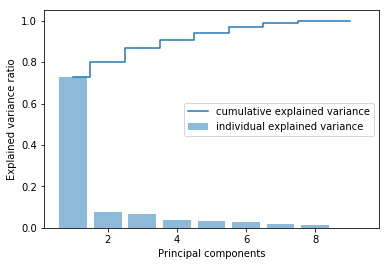

In [97]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q10 Find correlation between components and features

In [122]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=6)
X_std_4D= X_reduced.fit_transform(X_train_std)

Proj_data_df = pd.DataFrame(X_std_4D)
Proj_data_df.head(5)

,0,1,2,3,4,5
0,-1.464894,-0.594825,-0.038561,-0.210289,0.331057,0.161248
1,1.840558,0.328346,-0.589679,1.530500,-1.232804,-0.758275
2,-1.588547,0.023849,-0.185923,-0.149071,0.266579,-0.192571
3,1.700122,-0.524166,1.516548,-0.436323,0.027713,-0.456084
4,-1.294853,0.003116,-0.371585,-0.110503,0.137450,0.642677


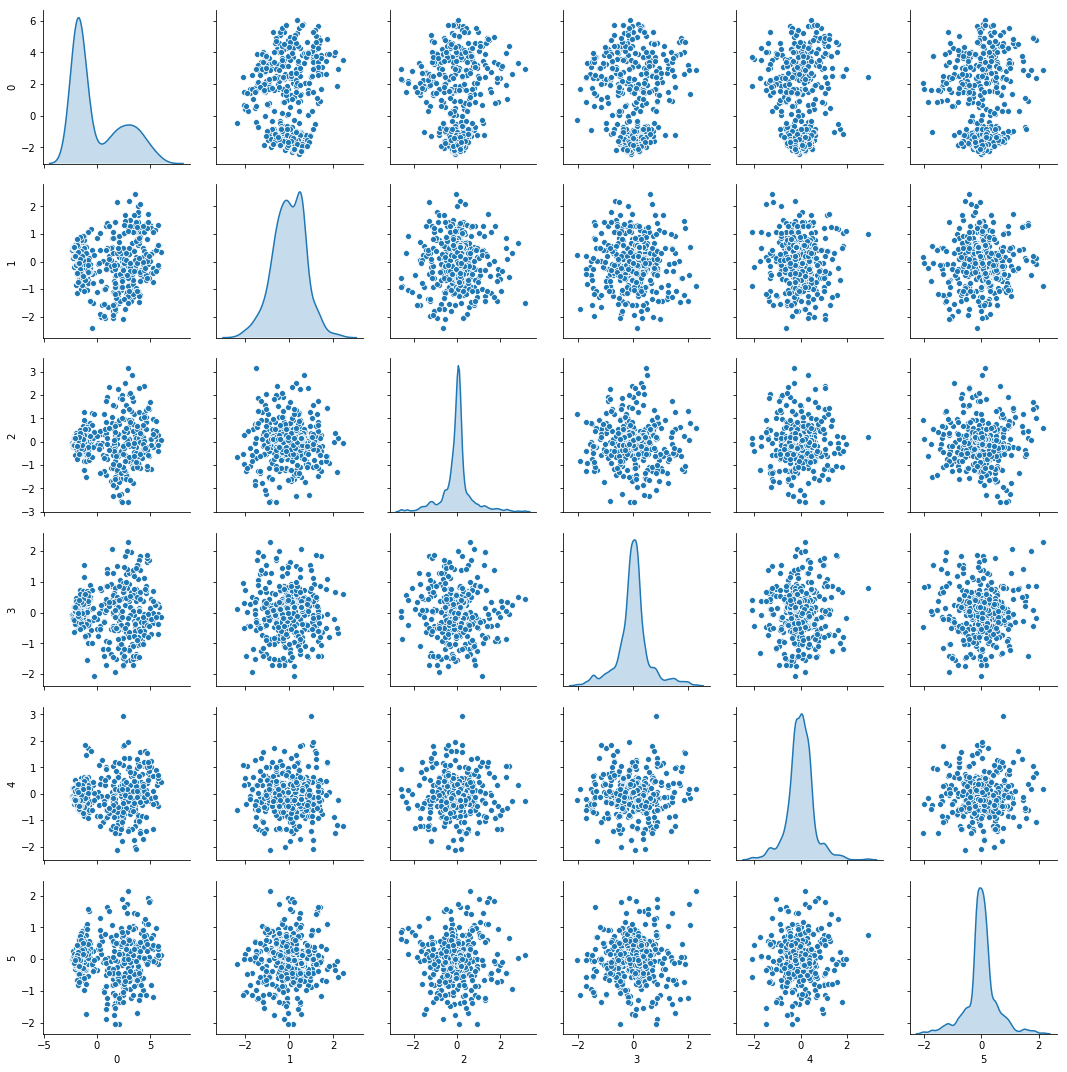

In [120]:
#Let us check it visually


sns.pairplot(Proj_data_df, diag_kind='kde')

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [105]:
jokes = pd.read_csv('jokes.csv')
jokes = jokes.drop(['NumJokes'],axis=1)
jokes.head(3)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [107]:
jokes.columns = range(100)
jokes.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [108]:
jokes = jokes.replace(99,0)
jokes.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [112]:
jokes = jokes.replace(99,0)
jokes.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [114]:
ratings_diff = StandardScaler().fit_transform(jokes)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [115]:
ratings_diff = pd.DataFrame(ratings_diff)

In [116]:
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.994883,1.808647,-2.238521,-1.728763,-1.507804,-2.191269,-1.714352,0.972648,-2.100627,-1.260430,...,0.615141,-0.142508,-0.316493,-0.143678,-0.127407,-0.197260,-1.883245,-0.092466,0.003988,-0.158168
1,0.825933,-0.092487,1.394499,1.257092,-0.529682,-2.450540,-0.054678,-0.956808,2.247283,1.767946,...,0.615141,-1.653101,-0.408176,2.213438,-0.184104,-0.862832,0.700170,0.003456,-1.258848,0.155726
2,-0.141204,-0.031768,-0.047824,0.215736,1.641597,1.780490,1.721464,2.007371,0.085501,-0.229309,...,-0.239054,-0.142508,-0.316493,2.579301,-0.127407,-0.197260,-0.209525,-0.092466,0.003988,-0.158168
3,-0.141204,1.716521,-0.047824,0.215736,0.265756,1.532394,-0.435020,1.386537,0.085501,0.169275,...,-0.239054,-0.142508,-0.316493,0.015262,-0.127407,-0.197260,-0.209525,-0.092466,0.003988,-0.158168
4,1.873665,0.933455,-0.993497,-1.068682,0.182026,0.066174,1.359321,1.061918,-0.021615,1.011935,...,1.333028,1.560344,1.033455,1.412738,1.582462,0.284813,0.715034,1.755437,0.530170,0.311206
5,-1.603761,-0.772959,0.051960,-1.809784,-1.425976,-1.257001,-1.503253,-0.049903,-1.533402,-0.619229,...,-1.311341,-2.245132,-0.531474,-1.031345,-0.777933,-1.239160,-0.194661,-2.654139,-1.472244,-1.170256
6,-0.141204,-0.031768,-0.047824,0.215736,1.557867,-2.493007,1.483068,1.909986,0.085501,-0.229309,...,-0.239054,-0.142508,-0.316493,-0.143678,-0.127407,0.527405,-0.209525,-0.092466,0.003988,-0.158168
7,1.480173,0.629860,2.031752,-1.264085,-1.629593,-0.671407,1.765140,0.412679,-1.177974,-1.186779,...,1.950955,-0.484299,-0.348108,-1.847040,-1.070371,-1.239160,0.426667,-0.106572,0.386932,-0.158168
8,-1.039598,-0.772959,-2.184094,-1.426127,-1.739965,-0.356259,-0.884515,-1.685173,-1.827969,-0.575904,...,1.084645,-0.231007,1.001841,-0.230646,-0.213945,-0.287455,-0.295738,-0.174281,-0.989911,-1.610295
9,0.572297,1.046518,1.120095,0.933008,1.143021,0.859632,1.703266,0.637884,0.818267,1.538327,...,-0.239054,1.221604,-0.316493,-0.143678,-0.127407,-0.197260,-0.209525,-0.092466,0.003988,-0.158168
